In [1]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

Check the sequence it produces:

In [2]:
[rng() for i in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

One should carefully choose constants $m$, $a$ and $c$. Things can easily go bad if they are choosen "at random":

In [3]:
def rng(m=97, a=5, c=0):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 7

random = [rng() for i in range(1000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[0.36082474226804123,
 0.8041237113402062,
 0.020618556701030927,
 0.10309278350515463,
 0.5154639175257731,
 0.5773195876288659,
 0.8865979381443299,
 0.4329896907216495,
 0.16494845360824742,
 0.8247422680412371]

Samples distribution also mimics uniform distribution

In [4]:
import matplotlib.pyplot as plt
plt.hist(random, normed=True)
plt.show()

NameError: name 'random' is not defined

However, spectral test shows that samples are bunched up on five lines

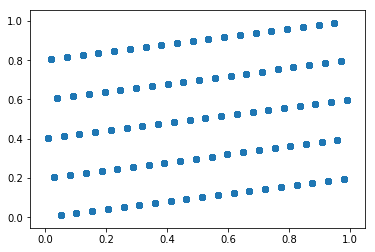

In [6]:
plt.scatter(random[1:], random[:-1])
plt.show()

Appropriate constants produce more "random" scatter

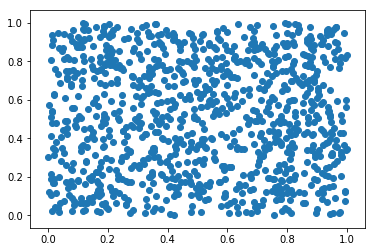

In [8]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for i in range(1000)]
plt.scatter(random[1:], random[:-1])
plt.show()

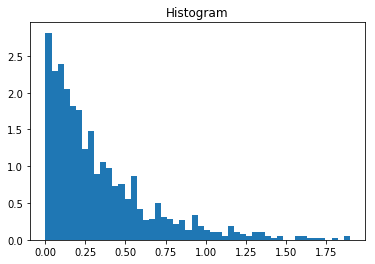

In [5]:
#Sampling exp(lambda)

import math
import numpy as np
lamb = 3

def f(a) :
    return -(1 / lamb)*(math.log1p(a-1))

def e_density(a) :
    return lamb*math.exp(-a * lamb)

r_dist = np.random.uniform(1,0,1000)
values = np.array([f(xi) for xi in r_dist])
plt.hist(values,50,density = True)
plt.title('Histogram')
plt.show()

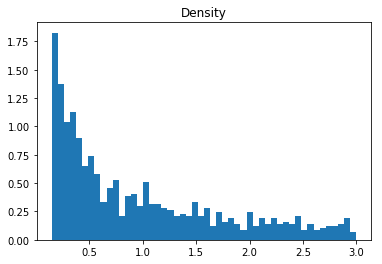

In [10]:
dens_val = np.array([e_density(xi) for xi in r_dist])
plt.hist(dens_val,50,density = True)
plt.title('Density')
plt.show()

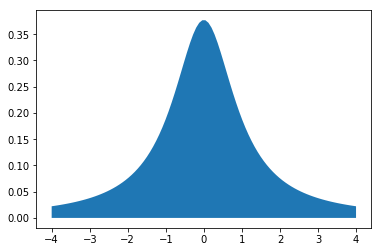

In [12]:
# Proove that the accept-reject method is valid. Sample 100 points from truncated cauchy distribution

from scipy import stats
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)*math.pi/(2*np.arctan(4)))
plt.show()

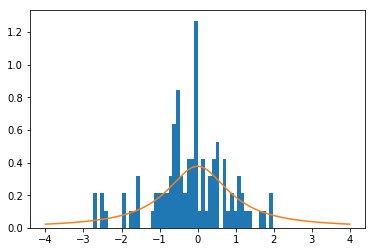

In [66]:
def cauchy_density(x):
    return 1 / ((1 + x*x) * (2*np.arctan(4)))

k = 0
sample = []
while k < 100000 and len(sample) < 100:
    x = rng()*5-3
    y = rng()/3  
    if y <= cauchy_density(x):
        sample.append(x)
        k+=1
X = np.linspace(-4, 4, 1000)
plt.hist(sample, bins=50, density = 1)
plt.plot(X, 1/(1 + X*X)/(2*np.arctan(4)))
plt.show() 

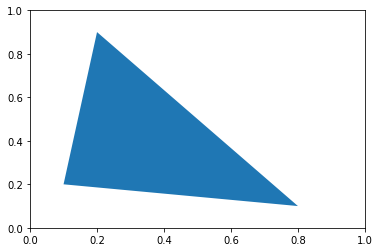

In [6]:
#Sample 100 point uniformly distributed inside the triangle given below.

import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

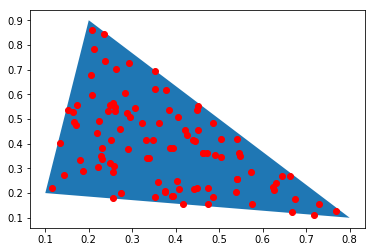

In [38]:
x_in_square = np.random.uniform(0,1,100)
y_in_square = np.random.uniform(0,1,100)
z = (x_in_square+y_in_square<=1)
w = ((x_in_square+y_in_square>1))
id = np.array([1 for i in range(100)])
x_in_square = x_in_square*z + (id-x_in_square)*w
y_in_square = y_in_square*z +(id-y_in_square)*w

x_in_trian = 0.1*(x_in_square +7*y_in_square+1)
y_in_trian = 0.1*(7*x_in_square - y_in_square + 2)
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(x_in_trian,y_in_trian, color = 'red')
plt.show()

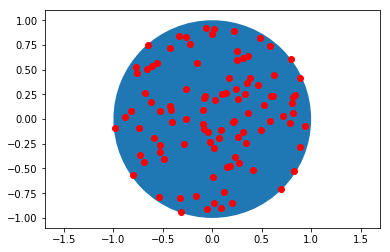

In [7]:
#Sample 100 point uniformly distributed inside the unit circle

from matplotlib.patches import Circle
circle = Circle(np.array([0, 0]), 1)
plt.gca().add_collection(PatchCollection([circle]))
plt.axis('equal')
r = (np.random.uniform(0, 1,100))
phi = np.pi * np.random.uniform(0, 2,100)

x_unif = np.sqrt(r)*np.cos(phi)
y_unif = np.sqrt(r)*np.sin(phi)
plt.scatter(x_unif,y_unif, color = 'red')
plt.show()

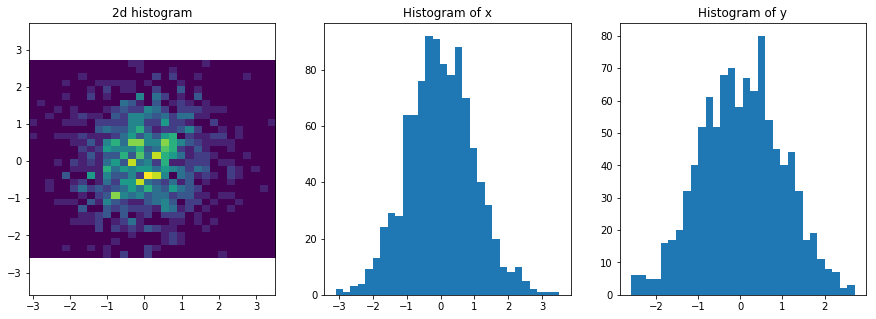

In [21]:
#Check theoretically and numerically that the following algorithm (also called Box-Muller algorithm) generates pairs of independent N(0,1)

#P(r<=x)=P(sqrt(-2log(u1))<=x)=P(log(u1)>=-(x^2)/2)=P(u1>=e^(-(x^2)/2))=1-e^(-(x^2)/2) => плотность r - f(x)=x*e^(-(x^2)/2)
#theta=2pi*u2, где u2~R[0,1] => плотность theta - g(x)=1/(2pi)*I{0<=x<=2pi}
#u1 и u2 независ => их совместная плотность - f(t1)*g(t2) = Ф(t1, t2)
#Посмотрим на плотность вектора (X,Y) - G, где X=r*cos(theta), Y=r*sin(theta): G(x,y) = Ф(x,y)/|det(J)|, где J - якобиан, J=r
#=> G(x,y) = 1/(2pi)*sqrt(x^2+y^2)*e^(-(x^2+y^2)/2)/(sqrt(x^2+y^2)) = 1/2pi*e^(-(x^2+y^2)/2), что равносильно тому, что Х и Y
#независимые N(0,1) величины.

n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

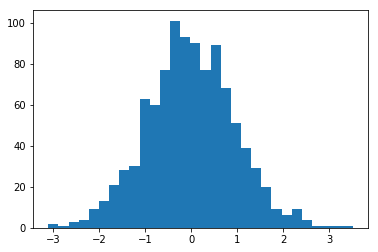

In [22]:
n = 100
U1, U2 = 2*np.random.rand(2, n) - 1
r = np.array(U1**2 + U2**2)
k = 0
for i in range(100) :
    if (r[i] < 1) :
        x[k] = (math.sqrt(math.log(r[i])/(-2*r[i]))) * U1[i]
        y[k] = (math.sqrt(math.log(r[i])/(-2*r[i]))) * U2[i]
        k += 1
plt.hist(x,bins = 30)
plt.show()

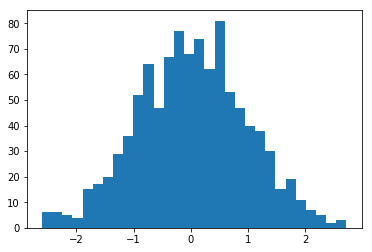

In [23]:
plt.hist(y,bins = 30)
plt.show()

## Markov Chain Monte Carlo (MCMC)

Рассмотрим граф $G=(V,E)$, вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1. Пример расстановки значений по вершинам графа (черные вершины имеют значение 1, белые - 0):

![img](http://www.mathematik.uni-ulm.de/stochastik/lehre/ss06/markov/skript_engl/bild4.jpg)

Как оценить, сколько в среднем закрашенных вершин будет иметь такой граф?

Сформулируем задачу в математических терминах.

Пусть $\xi \in \{0,1\}^{V}$ обозначает конфигурацию графа (расстановку 0 и 1 по вершинам). Назовем конфигурацию допустимой, если вершины, соединенные ребрами, не имеют одновременно значения 1. Пусть $Z_G$ - общее количество допустимых конфигураций. Зададим  распределение на множестве всех конфигураций:
$$\begin{equation*}
\mu(\xi) = 
 \begin{cases}
   \frac{1}{Z_G}, &\xi - \text{допустимая конфигурация}\\
   0, &\text{иначе.}
 \end{cases}
\end{equation*}$$
Обозначим $n(\xi)$ - число закрашенных вершин в конфигурации $\xi$. Тогда
$$\begin{equation*}
{\rm E} n(\xi) = \sum_{x \in \{0,1\}^V} n(x) \mu(x) = \frac{1}{Z_G} \sum_{x \in \{0,1\}^V} n(x) {\rm I}_{\{\xi - \text{допустимая} \}}
\end{equation*}$$

Явно перебирать все $x \in \{0,1\}^{V}$ сложновато. Мы могли бы попробовать оценить ${\rm E} n(\xi)$, используя закон больших чисел:
$$\begin{equation*}
{\rm E} n(\xi) \approx \frac{1}{N} \sum_{i=1}^{N} n(\xi), \text{где } \xi \sim \mu
\end{equation*}$$
Но есть проблема: как смоделировать случайную величину из распределения $\mu$?

В этом нам поможет метод MCMC.

### Метод MCMC

Предназначение: приближенное моделирование случаных величин из заданного распредедения 

Идея:
* построить эргодическую цепь Маркова, для которой стационарное распределение - это в точности наше заданное распределение

* инициировать блуждание по цепи Маркова из некоторого начального состояния и дождаться, когда распределение сойдется в стационарному. С этого момента состояния цепи Маркова можно считать выборкой из желаемого распределения.

Вот как это работает https://chi-feng.github.io/mcmc-demo/app.html#RandomWalkMH,multimodal

Алгоритм:
* пусть $\pi$ - заданное распределение (не обязательно нормированное к 1) на множестве $\Omega$
* пусть $Q = (q_{i,j})$ - матрица переходных вероятностей произвольной цепи Маркова с состояниями из $\Omega$
* выберем произвольное $X_0$ из $\Omega$
* для текущего $X_n$ смоделируем значение $Z_{n+1}$ из распределения $q_{X_n, \cdot}$
* смоделируем случайную величину $\alpha$ из распределения Бернулли с вероятностью успеха
$$
p = \min ( 1, \frac{\pi_j q_{j,i}}{\pi_i q_{i,j}} )
$$
* если $\alpha$ = 1, то $X_{n+1} = Z_{n+1}$, иначе $X_{n+1} = X_{n}$.

Обоснование и доказательства можно почитать здесь http://probability.ca/jeff/ftpdir/johannes.pdf

Некоторые типичные способы задания $q$:
* Metropolis algorithm: $q_{i,j} = q_{j,i}$
* Random walk Metropolis-Hastings: $q_{i,j} = q(j - i)$
* Independence sampler: $q_{i,j} = q(j)$ independent of $i$

### Задание
1) Описать применение МСМС к задаче оценки  ${\rm E} n(\xi)$, доказать все попутные утверждения

2) Оценить  ${\rm E} n(\xi)$ с помощью МСМС

3) Построить график распределеиня $n(\xi)$

4) Реализовать генератор случайных графов с допустимыми конфигурациями.

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray.
        Mask for vertices colors.
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.full_like(narr, 'red', dtype='U10')
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel(),s = 100)
    plt.show()

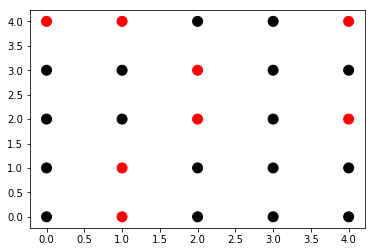

In [25]:
size = 5
narr = np.random.choice([True, False], size=(size, size))
plot_grid(narr)

In [30]:
#Алгоритм:
#1.Выбираем случайную вершину и берем q~Bern(1/2)
#2. Если q=0, то смотрим на соседей выбранной вершины(node): если они 0, то ставим в ней значение 1.
#3. Оставляем значения в соседних вершинах такими же.

#Из допустимой конфигурации мы можем получить конфигурацию, где в каждой вершине стоит 0, а значит можем получить все допустимые конф. 
#=> цепь неприводима. Докажем стационарность: для этого достаточно показать обратимость, т.е. m(v1)P(v1, v0) = m(v0)*P(v1, v0).
#Пусть конф. различаются одной вершиной => значения всех соседей v0 и v1 равны 0=>  m(v1)P(v1, v0) = 1/(2*Z_G) = m(v0)*P(v1,v0).
#Если конф. различаются >1 вершиной, то все ок, т.к. алгоритм затрагивает лишь одну вершину за шаг.


def f(graph) :
    if (graph[node[0]][node[1]-1] == False and graph[node[0]-1][node[1]] == False and graph[node[0]][node[1]+1] == False and graph[node[0]+1][node[1]] == False) :
        return 1
    return 0

graph = np.array([[False for i in range(size)] for j in range(size)])

nb = 0
k = 0
iterations = 100
for i in range(iterations):
    node = [np.random.choice(size-2)+1,np.random.choice(size-2)+1]
    q = np.random.choice(2)
    if (q == 1 and f(graph) == 1) :
        if (graph[node[0]][node[1]] == False) :
            k += 1
        graph[node[0]][node[1]] = True
    else :
        if (graph[node[0]][node[1]] == True) :
            k -= 1
        graph[node[0]][node[1]] = False
    nb += k

print(nb/iterations)

2.12


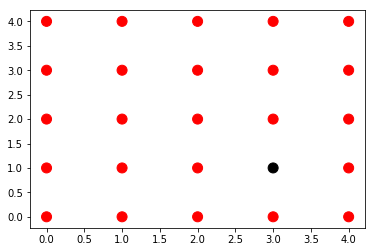

In [31]:
plot_grid(graph)